In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [156]:
House_dataframe = pd.read_csv("./Bengaluru_House_Data.csv")
House_dataframe.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [157]:
House_dataframe.shape

(13320, 9)

In [158]:
House_dataframe.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [159]:
House_dataframe.drop(["area_type","availability","society","balcony"],axis="columns",inplace=True)

In [160]:
House_dataframe.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [161]:
House_dataframe.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [162]:
for i in  House_dataframe.columns:
   House_dataframe[i].fillna(value=House_dataframe[i].mode()[0],inplace=True)

In [163]:
House_dataframe.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [164]:
for i in  House_dataframe.columns:
    print(f"Unique Values in {i} : {len(House_dataframe[i].unique())}")
    print(House_dataframe[i].unique())

Unique Values in location : 1305
['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']
Unique Values in size : 31
['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '9 Bedroom' '27 BHK' '10 Bedroom'
 '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom' '14 BHK' '8 BHK'
 '12 Bedroom' '13 BHK' '18 Bedroom']
Unique Values in total_sqft : 2117
['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']
Unique Values in bath : 19
[ 2.  5.  3.  4.  6.  1.  9.  8.  7. 11. 10. 14. 27. 12. 16. 40. 15. 13.
 18.]
Unique Values in price : 1994
[ 39.07 120.    62.   ...  40.14 231.   488.  ]


In [165]:
House_dataframe = House_dataframe.loc[House_dataframe["size"]!='1 RK']

In [166]:
House_dataframe["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 Bedroom', '8 Bedroom', '2 Bedroom', '7 Bedroom',
       '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK', '9 BHK',
       '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom', '10 BHK',
       '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK', '12 Bedroom',
       '13 BHK', '18 Bedroom'], dtype=object)

In [167]:
House_dataframe["BHK"] = House_dataframe["size"].apply(lambda x:int(x.split(" ")[0]))

In [168]:
House_dataframe.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [169]:
House_dataframe["BHK"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [170]:
House_dataframe[House_dataframe["BHK"]>=10]

,location,size,total_sqft,bath,price,BHK
459,1 Giri Nagar,11 BHK,5000,9.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1735,Kadarenahalli,10 Bedroom,750,10.0,90.0,10
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
1795,SBM Colony,10 Bedroom,1660,10.0,475.0,10
3096,Jp nagar 8th Phase .,10 BHK,12000,12.0,525.0,10
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3523,Jigani,10 Bedroom,1200,10.0,105.0,10
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,150.0,11


In [171]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [172]:
House_dataframe[~House_dataframe["total_sqft"].apply(is_float)].head(25)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


In [173]:
def convert_to_numerical(x):
    val = x.split("-")
    if(len(val)==2):
        return ((float(val[0])+float(val[1]))/2)
    try:
      return float(x)  
    except:
        return None

In [174]:
House_dataframe["total_sqft"] = House_dataframe["total_sqft"].apply(convert_to_numerical)

In [175]:
House_dataframe["price_per_sqft"] = House_dataframe["price"]*100000/House_dataframe["total_sqft"]

In [176]:
House_dataframe.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [177]:
House_dataframe["location"] = House_dataframe["location"].apply(lambda x:x.strip())
location_stats = House_dataframe.groupby("location")["location"].agg("count").sort_values(ascending=False)

In [178]:
location_stats

location
Whitefield               541
Sarjapur  Road           399
Electronic City          302
Kanakpura Road           273
Thanisandra              234
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1294, dtype: int64

In [179]:
location_stats_lessthan_10 = location_stats[location_stats<=10]

In [180]:
House_dataframe["location"] = House_dataframe["location"].apply(lambda x: "other" if x in location_stats_lessthan_10 else x)

In [181]:
# we use 300 sq ft for a typical bedroom area this are like some outliers
House_dataframe = House_dataframe[(House_dataframe["total_sqft"]/House_dataframe["BHK"])>400]

In [182]:
House_dataframe.shape

(11518, 7)

<AxesSubplot:ylabel='total_sqft'>

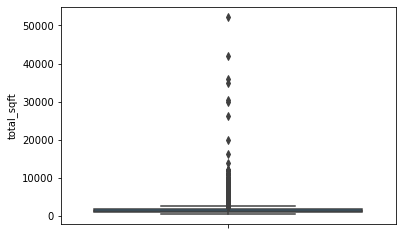

In [183]:
sns.boxplot(y=House_dataframe["total_sqft"])

<AxesSubplot:ylabel='price'>

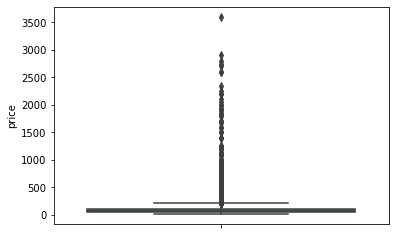

In [184]:
sns.boxplot(y=House_dataframe["price"])

<AxesSubplot:ylabel='price_per_sqft'>

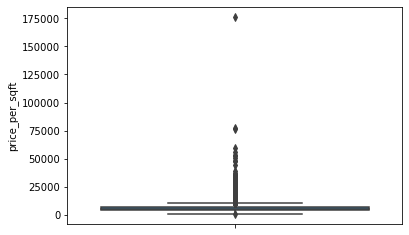

In [185]:
sns.boxplot(y=House_dataframe["price_per_sqft"])

In [186]:
House_dataframe.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,11518.000000,11518.000000,11518.000000,11518.000000,11518.000000
mean,1631.143666,2.526828,111.938053,2.593593,6124.683423
std,1301.290693,1.022420,155.936287,0.912543,3948.657198
min,410.000000,1.000000,8.440000,1.000000,267.829813
25%,1130.000000,2.000000,50.000000,2.000000,4200.158497
50%,1330.000000,2.000000,70.000000,2.000000,5253.539705
75%,1735.000000,3.000000,115.000000,3.000000,6768.855941
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [187]:
House_dataframe = House_dataframe[~(House_dataframe["bath"]>House_dataframe["BHK"]+1)]

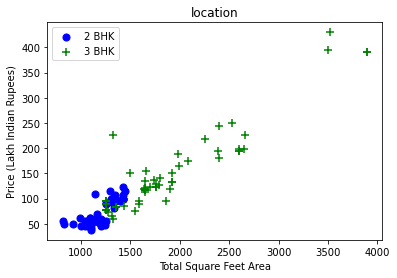

In [188]:
bhk2 = House_dataframe[(House_dataframe.location=="Hebbal") & (House_dataframe.BHK==2)]
bhk3 = House_dataframe[(House_dataframe.location=="Hebbal") & (House_dataframe.BHK==3)]
plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
plt.xlabel("Total Square Feet Area")
plt.ylabel("Price (Lakh Indian Rupees)")
plt.title("location")
plt.legend()

In [189]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
House_dataframe = remove_bhk_outliers(House_dataframe)

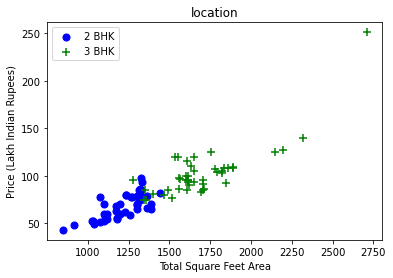

In [190]:
bhk2 = House_dataframe[(House_dataframe.location=="Yelahanka") & (House_dataframe.BHK==2)]
bhk3 = House_dataframe[(House_dataframe.location=="Yelahanka") & (House_dataframe.BHK==3)]
plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
plt.xlabel("Total Square Feet Area")
plt.ylabel("Price (Lakh Indian Rupees)")
plt.title("location")
plt.legend()

In [191]:
House_dataframe.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000
mean,1601.162204,2.473434,122.157313,2.521429,6707.103623
std,1116.002679,0.992475,162.264233,0.949887,4351.154426
min,410.000000,1.000000,8.440000,1.000000,416.666667
25%,1105.000000,2.000000,50.000000,2.000000,4544.422426
50%,1302.750000,2.000000,77.065000,2.000000,5816.880548
75%,1755.250000,3.000000,125.000000,3.000000,7383.549854
max,42000.000000,16.000000,2912.000000,16.000000,176470.588235


In [192]:
House_dataframe = House_dataframe[~(House_dataframe["BHK"]>House_dataframe["bath"]+1)]

In [193]:
House_dataframe.groupby("BHK")["BHK"].agg("count")

BHK
1      605
2     3829
3     2684
4      654
5       90
6       30
7       13
8       11
9        8
10       1
11       1
13       1
16       1
Name: BHK, dtype: int64

In [194]:
House_dataframe = House_dataframe[House_dataframe["BHK"]<7]

In [195]:
House_dataframe.groupby("bath")["bath"].agg("count")

bath
1.0     622
2.0    4371
3.0    1980
4.0     650
5.0     232
6.0      35
7.0       2
Name: bath, dtype: int64

In [196]:
House_dataframe = House_dataframe[House_dataframe["bath"]<7]

In [197]:
House_dataframe.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101


In [198]:
House_dataframe.drop(["price_per_sqft","size"],axis=1,inplace=True)

In [199]:
House_dataframe.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
6,Old Airport Road,2732.0,4.0,204.00,4


In [200]:
House_dataframe.describe()

,total_sqft,bath,price,BHK
count,7890.000000,7890.000000,7890.000000,7890.000000
mean,1568.176792,2.442839,119.155537,2.477693
std,967.313935,0.893826,155.281713,0.824472
min,410.000000,1.000000,8.440000,1.000000
25%,1101.000000,2.000000,50.000000,2.000000
50%,1300.000000,2.000000,76.000000,2.000000
75%,1742.500000,3.000000,125.000000,3.000000
max,30000.000000,6.000000,2912.000000,6.000000


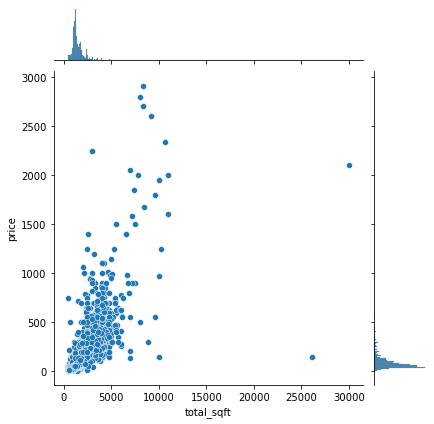

In [201]:
sns.jointplot(x=House_dataframe["total_sqft"],y=House_dataframe["price"])

In [202]:
House_dataframe = pd.get_dummies(House_dataframe,columns=["location"],drop_first=True)

In [203]:
House_dataframe.head()

,total_sqft,bath,price,BHK,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,204.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [204]:
def corr_oulier(df):
    remove_columns = []
    cr_mtrx_nt = df.drop("price",axis="columns").corr()
    cr_mtrx_tr = df.corr()["price"]
    for i in cr_mtrx_nt.columns:
        for j in cr_mtrx_nt.columns:
            if(((cr_mtrx_nt[i][j]>0.8) or (cr_mtrx_nt[i][j]< (-0.8)))  and i!=j):
                rm = i if cr_mtrx_tr[i]>cr_mtrx_tr[j] else j
                remove_columns.append((i,j,cr_mtrx_nt[i][j],rm))
    for i in cr_mtrx_tr.index:
        if(i!="price" and ((cr_mtrx_tr[i]<0.00009) and (cr_mtrx_tr[i]> (-0.00009)))):
            remove_columns.append((i,"price",cr_mtrx_tr[i]))
    return remove_columns
ls = corr_oulier(House_dataframe)

In [205]:
ls

[('bath', 'BHK', 0.895292670971156, 'bath'),
 ('BHK', 'bath', 0.895292670971156, 'bath')]

In [206]:
House_dataframe.corr()

,total_sqft,bath,price,BHK,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
total_sqft,1.000000,0.674034,0.755472,0.661793,-0.001715,-0.012801,0.031802,0.019864,-0.013204,-0.006706,...,0.041182,-0.007150,-0.016376,0.098716,-0.009109,0.015502,-0.032744,-0.013555,-0.016540,0.175957
bath,0.674034,1.000000,0.561860,0.895293,0.002883,-0.013665,0.018834,0.017197,-0.013691,-0.013849,...,0.032603,0.006909,-0.033074,0.094520,-0.016632,-0.002180,-0.050403,-0.014713,-0.014115,0.111993
price,0.755472,0.561860,1.000000,0.541038,0.008238,-0.016486,0.008803,-0.001242,-0.018454,-0.002969,...,0.001272,-0.011369,-0.021809,0.066254,-0.005998,-0.019926,-0.019472,-0.016816,-0.008933,0.280155
BHK,0.661793,0.895293,0.541038,1.000000,-0.002198,0.000964,0.039060,0.028632,-0.009789,-0.013663,...,0.040389,0.006323,-0.038678,0.074379,-0.008377,-0.008942,-0.059794,-0.017530,-0.022634,0.125283
location_1st Phase JP Nagar,-0.001715,0.002883,0.008238,-0.002198,1.000000,-0.001606,-0.000718,-0.001244,-0.002738,-0.002095,...,-0.001135,-0.001244,-0.003009,-0.008615,-0.001831,-0.005696,-0.002384,-0.001684,-0.003258,-0.015550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
location_Yelahanka,0.015502,-0.002180,-0.019926,-0.008942,-0.005696,-0.004501,-0.002012,-0.003486,-0.007675,-0.005872,...,-0.003182,-0.003486,-0.008435,-0.024148,-0.005133,1.000000,-0.006682,-0.004721,-0.009133,-0.043588
location_Yelahanka New Town,-0.032744,-0.050403,-0.019472,-0.059794,-0.002384,-0.001884,-0.000842,-0.001459,-0.003212,-0.002457,...,-0.001332,-0.001459,-0.003530,-0.010105,-0.002148,-0.006682,1.000000,-0.001976,-0.003822,-0.018240
location_Yelenahalli,-0.013555,-0.014713,-0.016816,-0.017530,-0.001684,-0.001331,-0.000595,-0.001031,-0.002269,-0.001736,...,-0.000941,-0.001031,-0.002494,-0.007141,-0.001518,-0.004721,-0.001976,1.000000,-0.002701,-0.012889
location_Yeshwanthpur,-0.016540,-0.014115,-0.008933,-0.022634,-0.003258,-0.002575,-0.001151,-0.001994,-0.004390,-0.003358,...,-0.001820,-0.001994,-0.004824,-0.013812,-0.002936,-0.009133,-0.003822,-0.002701,1.000000,-0.024931


In [207]:
House_dataframe.drop(columns=list(set([i[0] if len(i)==3 else i[3] for i in ls])),axis="columns",inplace=True)

In [208]:
total_sqft_high = House_dataframe["total_sqft"].quantile(0.99)
total_sqft_high

4827.329999999999

In [209]:
House_dataframe.total_sqft[House_dataframe["total_sqft"]>1.5*total_sqft_high] = 1.5*total_sqft_high

C:\Users\Admin\AppData\Local\Temp/ipykernel_1344/987848659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  House_dataframe.total_sqft[House_dataframe["total_sqft"]>1.5*total_sqft_high] = 1.5*total_sqft_high


In [210]:
price_high = House_dataframe["price"].quantile(0.99)
price_high

700.0

In [211]:
House_dataframe.price[House_dataframe["price"]>1.5*price_high] = 1.5*price_high

C:\Users\Admin\AppData\Local\Temp/ipykernel_1344/3401577898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  House_dataframe.price[House_dataframe["price"]>1.5*price_high] = 1.5*price_high


In [212]:
X = House_dataframe.drop(columns=["price"],axis="columns")
Y = House_dataframe["price"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1,random_state=10)

In [213]:
from sklearn.linear_model import LinearRegression,Lasso
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6808514428512642

In [214]:
ls = Lasso(alpha=0.001)
ls.fit(X_train,y_train)
ls.score(X_test,y_test)

0.6810425392475628

In [215]:
from sklearn.tree import DecisionTreeRegressor
regtree1 = DecisionTreeRegressor(max_depth=5)
regtree1.fit(X_train,y_train)
regtree1.score(X_test,y_test)

0.6793205315568369

In [216]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [217]:
xgb_reg = xgb.XGBRegressor(n_estimators=1000,learning_rate=0.1,gamma = 0.7,max_depth= 4,reg_alpha= 0.2,subsample= 0.9,random_state=42)
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.7, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0.2, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [218]:
xgb_reg.score(X_test,y_test)

0.8132024770991066

In [219]:
House_dataframe.head()

,total_sqft,price,BHK,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,1056.0,39.07,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,62.00,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,95.00,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,51.00,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,204.00,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
House_dataframe.shape

(7890, 244)

In [221]:
len(X_train.columns)

243

In [222]:
X_train.head()

,total_sqft,BHK,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
10470,1276.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9753,1125.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3121,2000.0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6430,1190.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1152,1360.0,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [223]:
def predict_price(location,sqft,bhk):    
    loc_index = np.where(X_train.columns==location)[0][0]
    
    x = np.zeros(len(X_train.columns))
    x[0] = sqft
    x[1] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    df = {}
    for i,j in zip(X_train.columns,x):
        df[i] = [j]
    ddf = pd.DataFrame(df)
    return xgb_reg.predict(ddf)

In [231]:
predict_price('location_Yelenahalli',5000, 4)

array([411.27435], dtype=float32)

In [225]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(xgb_reg,f)

In [226]:
import json
columns = {
    'data_columns' : [col for col in X_train.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))